**Import the necesary libraries**

Import necesary libraries to start, however more libraries are going to be imported further ahead

In [27]:
import pandas as pd
import calendar
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf
import numpy as np
import scipy.stats as stats

import dataframe_image as dfi


print('Libraries have been imported !')

Libraries have been imported !


**Dataset**

Open the excel file and open the sheet named:  '6. Precio OIC Mensual'
Delete the first 5 Rows and rename the Columns

In [28]:
# to use the URL
file = 'https://federaciondecafeteros.org/app/uploads/2020/01/Precios-%C3%A1rea-y-producci%C3%B3n-de-caf%C3%A9.xlsx'

# to use the local file
#file = pd.ExcelFile('Precios-área-y-producción-de-café.xlsx')

# name of the sheet '6. Precio OIC Mensual'
df = pd.read_excel(file, sheet_name = '6. Precio OIC Mensual')

df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,NaN,Precios indicativos OIC por grupos - Promedio ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Centavos de dólar por libra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Fuente: ICO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Suaves colombianos (arábigo),NaN,NaN,Otros suaves (arábigo),NaN,NaN,Naturales del Brasil (arábigo),NaN,NaN,Robustas,NaN,NaN,NaN


In [29]:
# removes the first column as it doesn't have any data
df = df.drop(df.columns[[0,-1]], axis = 1)

# remove the first 5 columns as is part of the format in the excel file
df = df.drop(index = df.index[0:6],
       axis = 0)

# because the first 5 rows where deleted, I need to reset the index to be 0 and not to start at row # 6
df = df.reset_index(drop=True)

In [30]:
# renames the column for an easier comprenhesion 
df = df.rename(columns = {'Unnamed: 1': 'Date', 'Unnamed: 2':'OIC_price',
                          'Unnamed: 3':'Colombia_ny', 'Unnamed: 4':'Colombia_europe', 'Unnamed: 5':'Colombia_average',
                          'Unnamed: 6':'Other_ny', 'Unnamed: 7':'Other_europe','Unnamed: 8':'Other_average',
                          'Unnamed: 9':'Brazil_ny', 'Unnamed: 10':'Brazil_europe', 'Unnamed: 11':'Brazil_average',
                          'Unnamed: 12':'Robustas_ny', 'Unnamed: 13':'Robustas_europe','Unnamed: 14':'Robustas_average'})
df.head()

,Date,OIC_price,Colombia_ny,Colombia_europe,Colombia_average,Other_ny,Other_europe,Other_average,Brazil_ny,Brazil_europe,Brazil_average,Robustas_ny,Robustas_europe,Robustas_average
0,2000-01-01 00:00:00,82.15,130.12,124.36,130.13,109.17,116.82,111.11,97.67,103.1,97.68,53.62,52.41,53.18
1,2000-02-01 00:00:00,76.15,124.72,118.67,124.73,101.17,110.19,103.44,91.51,96.58,91.51,49.41,47.97,48.85
2,2000-03-01 00:00:00,73.49,119.51,115.78,119.51,98.26,108.13,100.73,89.93,94.78,89.93,47.26,44.73,46.25
3,2000-04-01 00:00:00,69.53,112.67,109.12,112.67,92.41,101.51,94.61,86.46,90.7,86.46,45.21,43.31,44.45
4,2000-05-01 00:00:00,69.22,110.31,107.85,110.31,91.76,100.99,94.17,87.23,91.01,87.23,45.19,43.01,44.32


## Exploratory Data Analysis

### Description of each Column

**Date:** Column expressing the date montly beginning January of 2000, all prices will have a reference for this date.

**OIC_price:** Is the average price of the International Coffee Organization for the month and year shown, measured in US cents/lb

**Colombia_ny:** Is the average price of Colombian Mild Arabicas for the month and year shown and is expresed in US cents/lb, in the US market

**Colombia_europe:** Is the average price of Colombian Mild Arabicas for the month and year shown and is expresed in US cents/lb, in Germany and France

**Colombia_average:** Is the weighted average Colombian Mild Arabicas Composite Indicator Price, as per "Section 4 "of the Indicator Prices SC-106/21 for the month and year shown and is expresed in US cents/lb

**Other_ny:** Is the average price of Other Mild Arabicas for the month and year shown and is expresed in US cents/lb, in the US market

**Other_europe:**  Is the average price of Other Mild Arabicas for the month and year shown and is expresed in US cents/lb, in Germany and France

**Other_average:** Is the average price of Other Mild Arabicas Composite Indicator Price, as per "Section 4 "of the Indicator Prices SC-106/21 for the month and year shown and is expressed in US cents/lb

**Brazil_ny:** Is the average price of Brazilian Naturals for the month and year shown and is expresed in US cents/lb, in the US market

**Brazil_europe:**  Is the average price of Brazilian Naturals for the month and year shown and is expresed in US cents/lb, in Germany and France

**Brazil_average:** Is the average price of Brazilian Naturals Composite Indicator Price, as per "Section 4 "of the Indicator Prices SC-106/21 for the month and year shown and is expressed in US cents/lb

**Robustas_ny:** Is the average price of Robustas for the month and year shown and is expresed in US cents/lb, in the US market

**Robustas_europe:** Is the average price of Robustas for the month and year shown and is expresed in US cents/lb, in Germany and France

**Robustas_average:** Is the average price of Robustas Composite Indicator Price, as per "Section 4 "of the Indicator Prices SC-106/21 for the month and year shown and is expressed in US cents/lb

**[Indicator Prices SC-106/21 ]** (https://www.ico.org/documents/cy2020-21/sc-106e-rules-indicator-prices.pdf)

Checking how many NA's are there in the dataset, what type of each column is, how many columns we have and in general all the information from the data 

In [31]:
# create a copy of the data frame to modify it and to keep the original intact
eda = df.copy()

# checking that both dataframes are diffetent in memory
print(f' Memory for df: {id(df)} ----- Memory for eda: {id(eda)}')

 Memory for df: 2787007631072 ----- Memory for eda: 2787005202192


In [32]:
# exploring the data types, the amount of row and if there are NA's
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              272 non-null    object
 1   OIC_price         272 non-null    object
 2   Colombia_ny       272 non-null    object
 3   Colombia_europe   272 non-null    object
 4   Colombia_average  272 non-null    object
 5   Other_ny          272 non-null    object
 6   Other_europe      272 non-null    object
 7   Other_average     272 non-null    object
 8   Brazil_ny         272 non-null    object
 9   Brazil_europe     272 non-null    object
 10  Brazil_average    272 non-null    object
 11  Robustas_ny       272 non-null    object
 12  Robustas_europe   272 non-null    object
 13  Robustas_average  272 non-null    object
dtypes: object(14)
memory usage: 29.9+ KB


In [33]:
# checking if tehre are NA's 
eda.isna().sum()

Date                0
OIC_price           0
Colombia_ny         0
Colombia_europe     0
Colombia_average    0
Other_ny            0
Other_europe        0
Other_average       0
Brazil_ny           0
Brazil_europe       0
Brazil_average      0
Robustas_ny         0
Robustas_europe     0
Robustas_average    0
dtype: int64

**Duplicates on each column**

Colombia_europe [20 - 40] On years 2001-09 and 2003-05, it was exactly the same price of the coffe

Brazil_ny[75 - 89] On years 2006-04 and 2007-06, it was exactly the same price of the coffe

Other_ny [158 - 159] On years 2013-03 and 2013-04, it was exactly the same price of the coffe

Other_europe [29 - 41] On years 2002-06 and 2003-06, it was exactly the same price of the coffe

Robustas_europe [118 - 119 - 130 - 183] On years 2010-11 and 2020-04, it was exactly the same price of the coffe

Robustas_ny [35 - 39] On years 2002-12 and 2003-04, it was exactly the same price of the coffe


In [34]:
# checking if there are duplicated values 
dup_OIC = eda[eda.duplicated(['OIC_price'],keep = False)]
dup_Col_ny = eda[eda.duplicated(['Colombia_ny'],keep = False)]
dup_Col_europe = eda[eda.duplicated(['Colombia_europe'],keep = False)]
dup_Col_average = eda[eda.duplicated(['Colombia_average'],keep = False)]
dup_Other_ny= eda[eda.duplicated(['Other_ny'],keep = False)]
dup_Other_europe= eda[eda.duplicated(['Other_europe'],keep = False)]
dup_Other_average= eda[eda.duplicated(['Other_average'],keep = False)]
dup_Brazil_ny= eda[eda.duplicated(['Brazil_ny'],keep = False)]
dup_Brazil_europe= eda[eda.duplicated(['Brazil_europe'],keep = False)]
dup_Brazil_average= eda[eda.duplicated(['Brazil_average'],keep = False)]
dup_Robustas_ny= eda[eda.duplicated(['Robustas_ny'],keep = False)]
dup_Robustas_europe= eda[eda.duplicated(['Robustas_europe'],keep = False)]
dup_Robustas_average= eda[eda.duplicated(['Robustas_average'],keep = False)]
#print(dup_Robustas_europe)

The types of the columns are object, Changing them for numeric type float, so we can see the statistics

In [35]:
# changes the format of the column 'Date' for just the year and the month
eda['Date'] = pd.to_datetime(eda['Date'], format = '%d%m%Y')

lista = list(eda.columns)
lista.pop(0)

for item in lista:
    eda[item] = eda[item].astype(float)
    
#checking descriptive statistics
eda.describe()

# saves the table as a png or svg
#df_styled = eda.describe().style.background_gradient()
#dfi.export(df_styled, "table statistics.png")

,OIC_price,Colombia_ny,Colombia_europe,Colombia_average,Other_ny,Other_europe,Other_average,Brazil_ny,Brazil_europe,Brazil_average,Robustas_ny,Robustas_europe,Robustas_average
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,113.633237,153.333888,148.409523,151.222932,145.099616,143.098234,143.966330,118.365112,123.408718,121.959193,79.670588,74.456376,75.376692
std,43.687941,62.437782,59.732402,61.156478,58.414410,55.916915,56.927377,49.732689,51.170812,50.984818,28.448193,26.567300,26.767165
min,41.170000,58.920000,57.720000,58.100000,51.950000,55.760000,54.280000,37.670000,38.710000,38.630000,21.250000,22.790000,22.810000
25%,88.547500,112.940000,111.697500,112.670000,108.720000,110.295000,109.712500,94.405000,96.056883,95.605714,57.895000,54.765000,55.347500
50%,113.155682,144.413636,141.123636,143.529552,141.896818,138.104348,140.704773,111.980000,117.983409,116.833333,84.680554,78.150682,79.203636
75%,133.130252,182.577237,178.760455,179.022500,169.232857,165.942045,166.686126,132.726023,143.199599,140.728880,103.530147,97.329432,98.367841
max,231.240000,319.633750,311.450000,312.950000,303.590000,297.220000,300.120000,271.390000,273.430000,273.400000,126.300000,121.300000,121.980000


The correlation between the attributes

In [36]:
# to check the correlation
eda.corr()

,OIC_price,Colombia_ny,Colombia_europe,Colombia_average,Other_ny,Other_europe,Other_average,Brazil_ny,Brazil_europe,Brazil_average,Robustas_ny,Robustas_europe,Robustas_average
OIC_price,1.000000,0.961247,0.974154,0.968370,0.983946,0.987328,0.986648,0.981872,0.988744,0.989057,0.902821,0.883472,0.888010
Colombia_ny,0.961247,1.000000,0.989911,0.997974,0.978964,0.978009,0.977207,0.953280,0.950817,0.952474,0.795684,0.761376,0.768793
Colombia_europe,0.974154,0.989911,1.000000,0.996692,0.979493,0.986822,0.982911,0.962704,0.967117,0.967156,0.810751,0.783200,0.789372
Colombia_average,0.968370,0.997974,0.996692,1.000000,0.981455,0.984258,0.981992,0.959397,0.959980,0.960859,0.802224,0.770656,0.777598
Other_ny,0.983946,0.978964,0.979493,0.981455,1.000000,0.995489,0.996963,0.971176,0.977323,0.977294,0.845858,0.812284,0.819485
Other_europe,0.987328,0.978009,0.986822,0.984258,0.995489,1.000000,0.997574,0.975087,0.984532,0.983430,0.841851,0.813314,0.819732
Other_average,0.986648,0.977207,0.982911,0.981992,0.996963,0.997574,1.000000,0.973195,0.981179,0.980708,0.846334,0.816121,0.822735
Brazil_ny,0.981872,0.953280,0.962704,0.959397,0.971176,0.975087,0.973195,1.000000,0.994153,0.996667,0.838267,0.819359,0.823952
Brazil_europe,0.988744,0.950817,0.967117,0.959980,0.977323,0.984532,0.981179,0.994153,1.000000,0.999492,0.856312,0.837155,0.841898
Brazil_average,0.989057,0.952474,0.967156,0.960859,0.977294,0.983430,0.980708,0.996667,0.999492,1.000000,0.854775,0.835624,0.840293


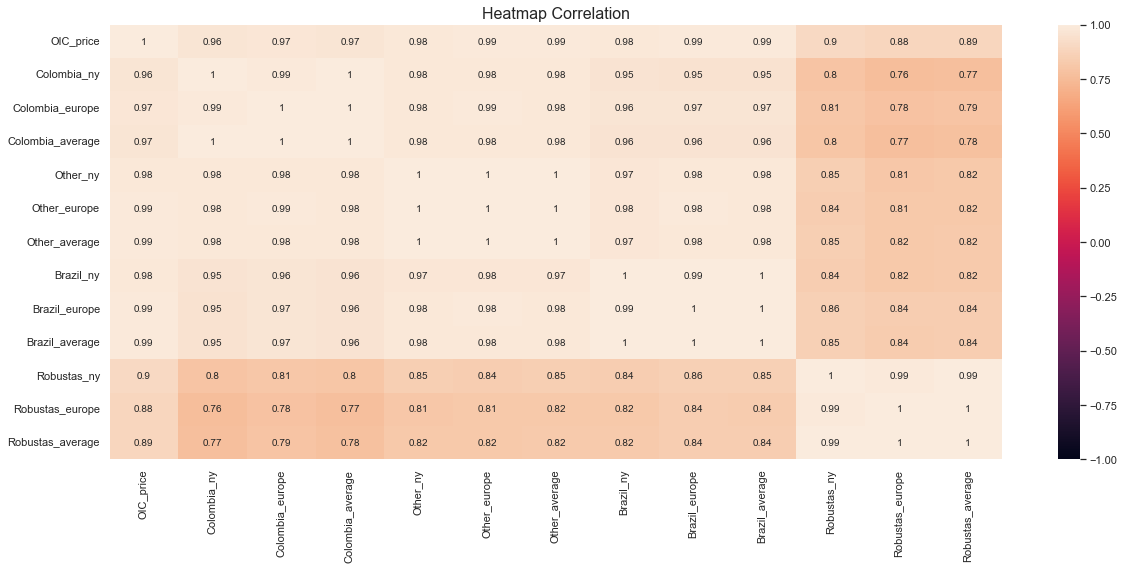

In [37]:
# checking the correlation visually on a heat map

plt.figure(figsize = (20,8))
hm = sns.heatmap(eda.corr(), annot = True, vmin = -1, vmax = 1)
hm.set_title('Heatmap Correlation', fontdict = {'fontsize':16});
#plt.savefig('Heat Map.svg')

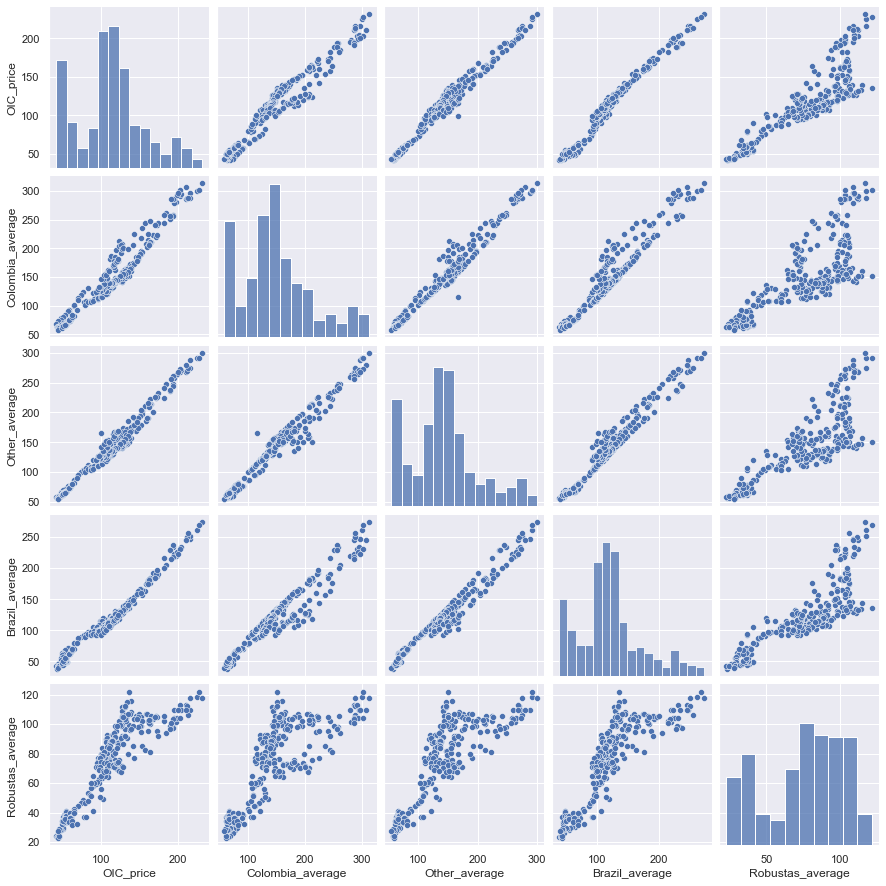

In [38]:
# Doing a scatter plot matrix just with the average columns
sns.pairplot(eda[['OIC_price', 'Colombia_average', 'Other_average', 'Brazil_average', 'Robustas_average']]);
#plt.savefig('scatter plot.svg')

#### Doing a box plot for each of the columns

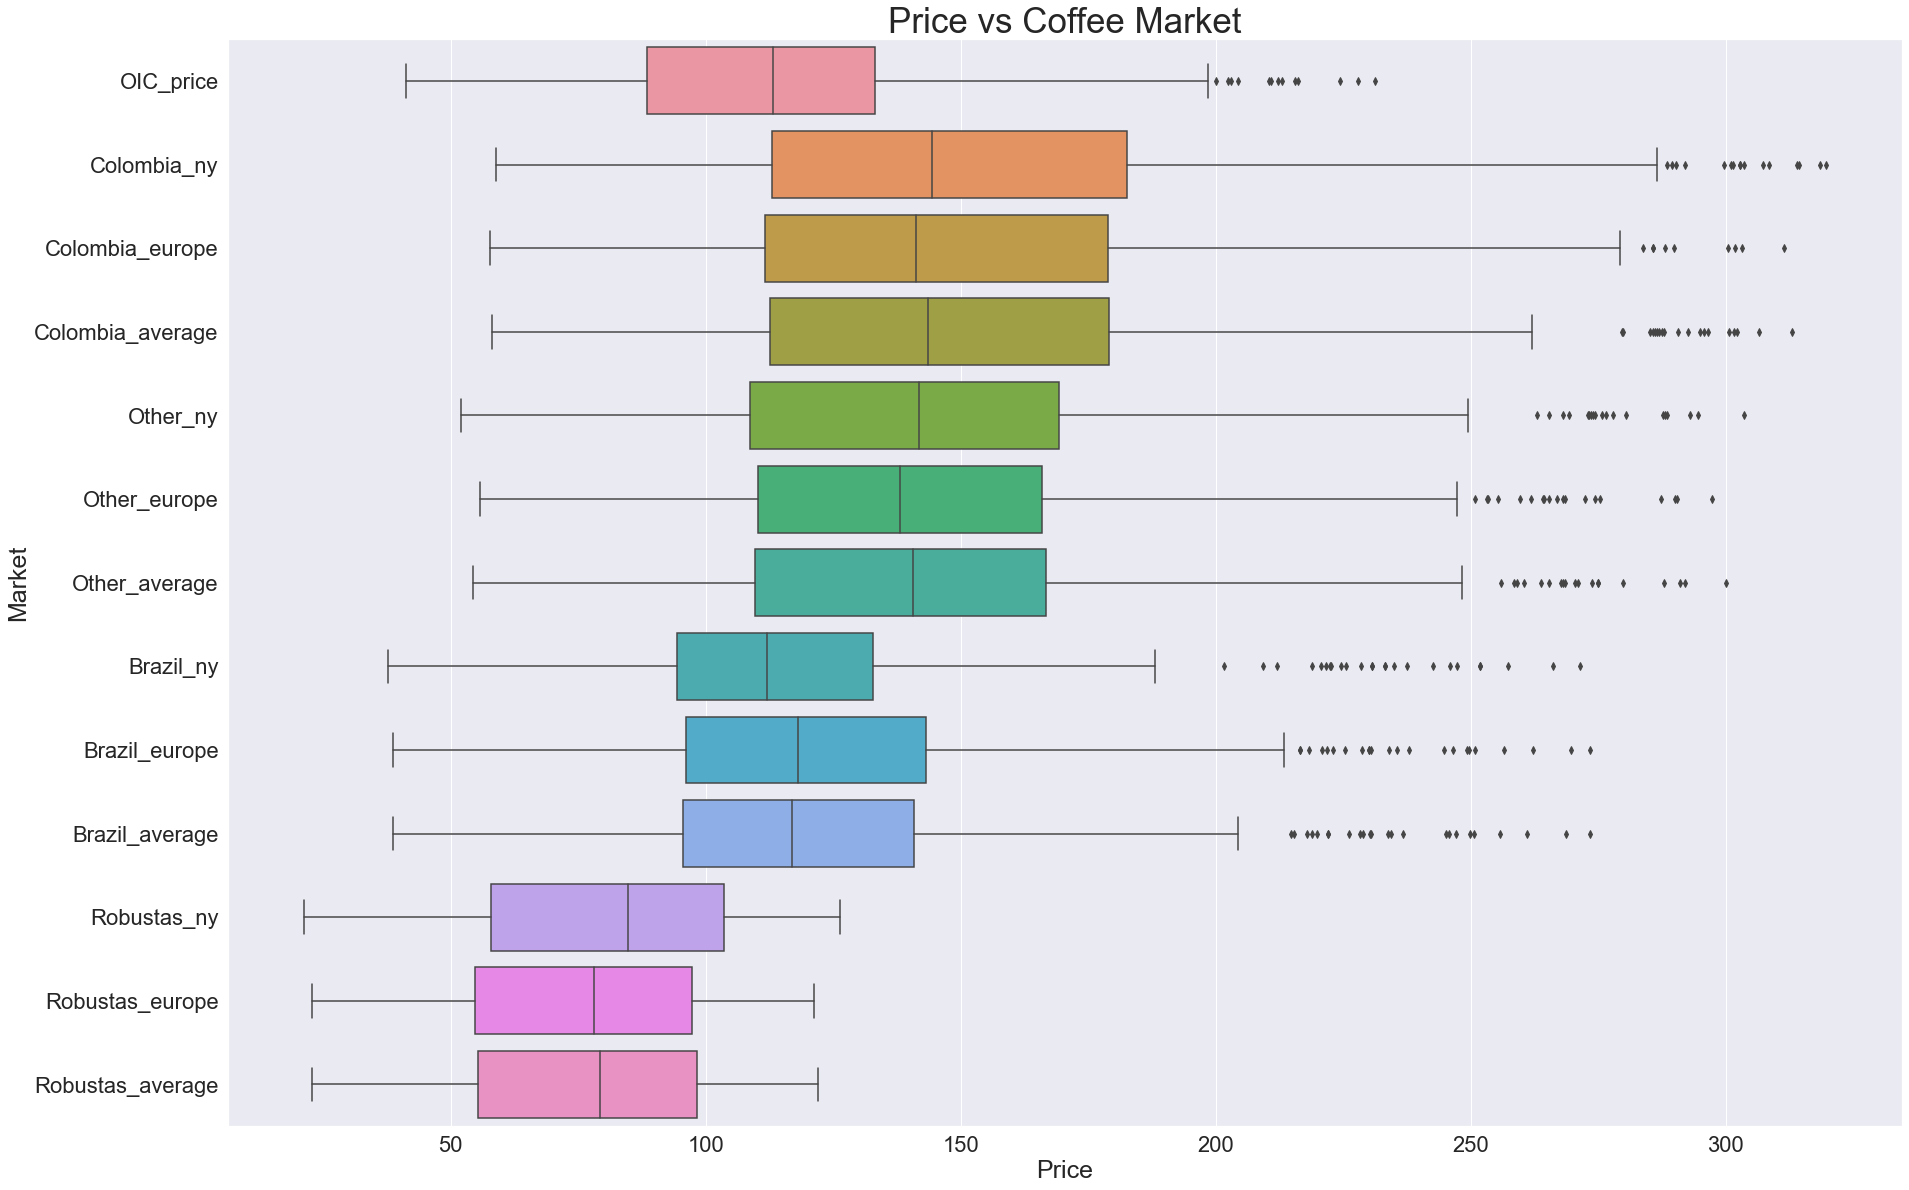

In [39]:
# incresesthe size of the graph
plt.figure(figsize=(30,20))

# increases the size of the font
sns.set(font_scale=2)

# sets the data and the orientation
s = sns.boxplot(data = eda, orient = 'h')

# label in x and the size of it
s.set_xlabel('Price', fontsize = 25)

# label in y and the size of it
s.set_ylabel('Market', fontsize = 25)

# title and its size
s.set_title('Price vs Coffee Market', fontsize = 35)

# show the graph!
plt.show();

The type of coffe Robustas, has the lowest prices, while Colombian Coffee has the highest prices and the 25% of Colombian Coffee price is basically the median of the OIC Price 

Graphing all columns, as a time series, to compare all of them together

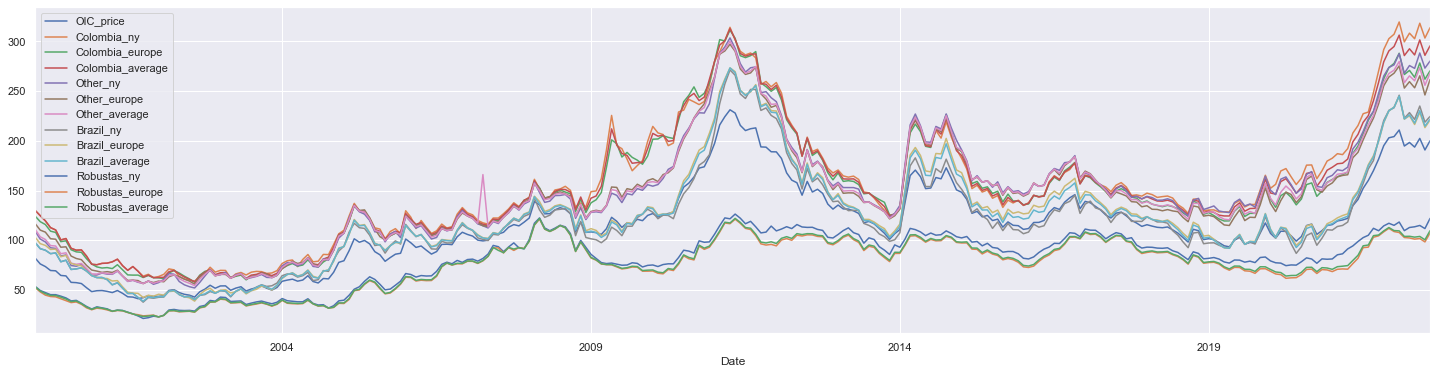

In [40]:
# create a list with th enames of the columns
lista = list(eda.columns)
#  removes the first item of the list, which is 'Date'
lista.pop(0)

# increases the size of the font
sns.set(font_scale=1)
# selects the size of the column
plt.figure(figsize=(25,6))
# plots the axes
ax = plt.gca()

# creates a loop graphing all the columns vs 'Date'
for column in lista:
    eda.plot(x ='Date', y = column, ax = ax)
    
#plt.savefig('Time vs price all.svg')

Comparing just the averages and the OIC prices

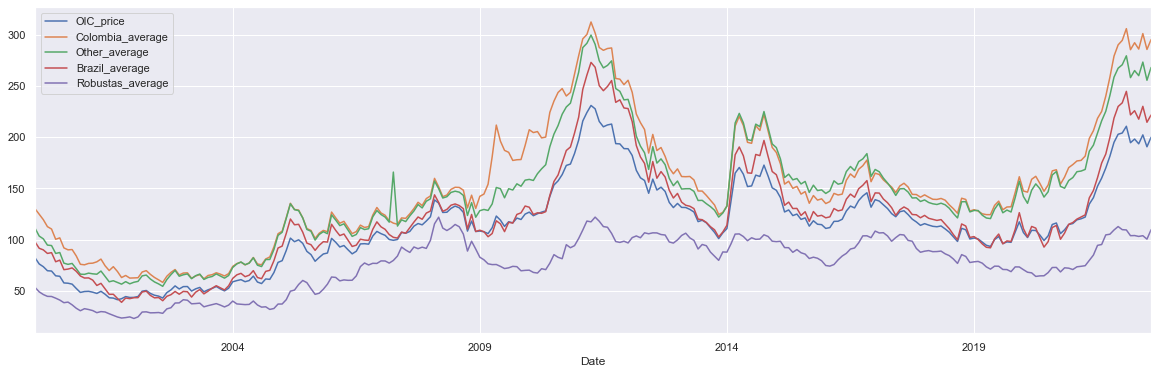

In [41]:
lista_averages = ['OIC_price', 'Colombia_average', 'Other_average', 'Brazil_average', 'Robustas_average']
# selects the size of the column
plt.figure(figsize=(20,6))
# plots the axes
ax = plt.gca()

# creates a loop graphing all the columns vs 'Date'
for column in lista_averages:
    eda.plot(x ='Date', y = column, ax = ax)
    
#plt.savefig('Time vs price averages.svg')

In [42]:
#'OIC_price', 'Colombia_average', 'Other_average', 'Brazil_average', 'Robustas_average'
eda_subset = eda.drop(['Date'], axis = 1)

In [43]:
# counts the number of outliers per column
def IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    x = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    print(f'Number of outliers {str(len(x))}')
    print(f'max outlier {x.max()}, min outlier {x.min()}')

for i in eda_subset:
    print('\n',i)
    print(IQR(eda_subset[i]))


 OIC_price
Number of outliers 13
max outlier 231.24, min outlier 200.11
None

 Colombia_ny
Number of outliers 16
max outlier 319.63375, min outlier 288.43
None

 Colombia_europe
Number of outliers 9
max outlier 311.45, min outlier 283.74
None

 Colombia_average
Number of outliers 19
max outlier 312.95, min outlier 279.55681818181813
None

 Other_ny
Number of outliers 19
max outlier 303.59, min outlier 262.94
None

 Other_europe
Number of outliers 19
max outlier 297.22, min outlier 250.75
None

 Other_average
Number of outliers 19
max outlier 300.12, min outlier 255.90657034106954
None

 Brazil_ny
Number of outliers 25
max outlier 271.39, min outlier 201.60674603174598
None

 Brazil_europe
Number of outliers 23
max outlier 273.43, min outlier 216.46838264311285
None

 Brazil_average
Number of outliers 24
max outlier 273.4, min outlier 214.80402869732916
None

 Robustas_ny
Number of outliers 0
max outlier nan, min outlier nan
None

 Robustas_europe
Number of outliers 0
max outlier nan, 

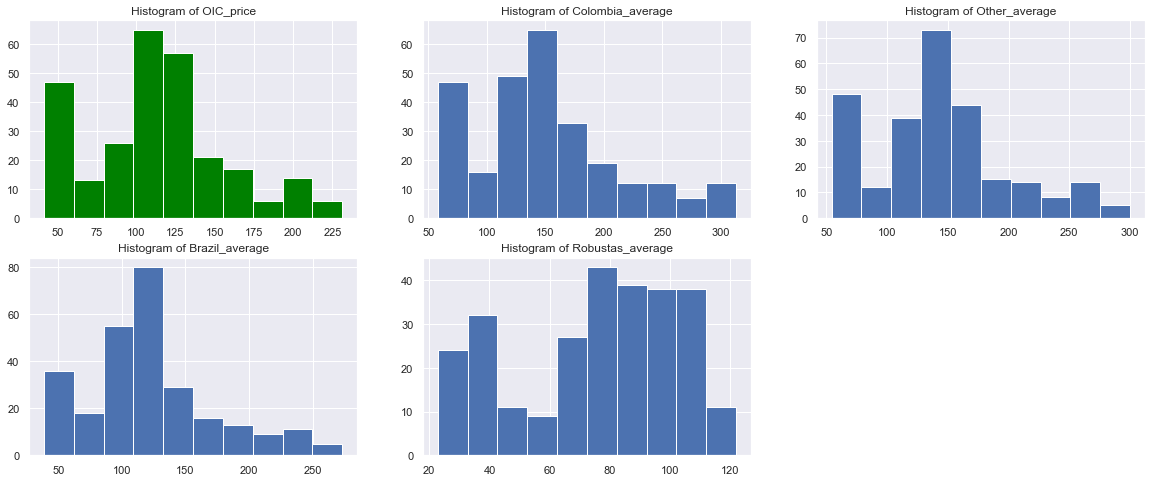

In [44]:
plt.figure(figsize=(20,8))
plt.subplot(2,3,1)
plt.hist(eda['OIC_price'], color = 'green')
plt.title('Histogram of OIC_price')

plt.subplot(2,3,2)
plt.hist(eda['Colombia_average'])
plt.title('Histogram of Colombia_average')

plt.subplot(2,3,3)
plt.hist(eda['Other_average'])
plt.title('Histogram of Other_average')

plt.subplot(2,3,4)
plt.hist(eda['Brazil_average'])
plt.title('Histogram of Brazil_average')

plt.subplot(2,3,5)
plt.hist(eda['Robustas_average'])
plt.title('Histogram of Robustas_average');

#plt.savefig('hist averages.svg')

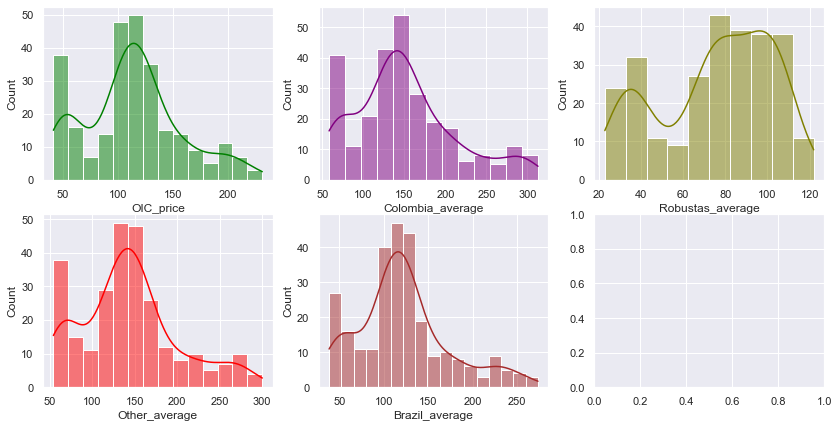

In [45]:
fig, axes = plt.subplots(2,3, figsize = (14,7))
sns.histplot(eda_subset['OIC_price'], kde = True, ax = axes[0, 0], color = 'green')
sns.histplot(eda_subset['Colombia_average'], kde = True, ax = axes[0,1], color = 'purple')
sns.histplot(eda_subset['Other_average'], kde = True, ax = axes[1,0], color = 'red')
sns.histplot(eda_subset['Brazil_average'], kde = True, ax = axes[1,1], color = 'brown')
sns.histplot(eda_subset['Robustas_average'], kde = True, ax = axes[0,2], color = 'olive')
plt.show()

In [46]:
# grouping by the year and checking the average price every year
eda.groupby(eda['Date'].dt.year).mean()
#df_styled = eda.groupby(eda['Date'].dt.year).mean().style.background_gradient()
#dfi.export(df_styled, "avg per year.svg")

,OIC_price,Colombia_ny,Colombia_europe,Colombia_average,Other_ny,Other_europe,Other_average,Brazil_ny,Brazil_europe,Brazil_average,Robustas_ny,Robustas_europe,Robustas_average
Date,,,,,,,,,,,,,
2000,64.245000,102.600833,99.801667,102.603333,85.094167,92.889167,87.075000,79.861667,83.666667,79.862500,42.118333,40.358333,41.413333
2001,45.591667,72.205000,68.235833,72.050833,61.937500,63.139167,62.283333,50.523333,52.415000,50.699167,27.300833,27.485833,27.540833
2002,47.755000,65.265000,64.780833,64.901667,60.439167,62.345833,61.554167,45.103333,45.920000,45.234167,30.835000,29.776667,30.027500
2003,51.896667,67.305000,64.336667,65.329167,64.088333,64.301667,64.199167,50.820000,50.158333,50.314167,38.391667,36.495833,36.944167
2004,62.150833,83.850833,79.492500,81.438333,80.145000,80.643333,80.466667,68.175833,69.110000,68.968333,37.279167,35.657500,35.978333
2005,89.344167,117.000000,114.670833,115.730833,114.292500,114.826667,114.830833,101.329167,102.485000,102.290000,53.375833,49.859167,50.505000
2006,95.745000,117.915000,115.704167,116.804167,113.950833,114.795833,114.400833,102.878333,104.186667,103.920833,70.282500,66.982500,67.558333
2007,107.679167,126.740833,124.703333,125.570000,123.163333,123.808333,127.832500,110.689167,112.064167,111.791667,88.263333,86.295000,86.371667
2008,125.465787,146.076027,144.266040,145.371284,139.630237,141.985913,141.213821,124.471924,129.475855,128.350946,107.656345,106.318875,106.561649


In [47]:
# 2011 has been the higest price for coffee for 'OIC_price', even 10 years after today!
avg_year = eda.groupby(eda['Date'].dt.year)['OIC_price'].mean()
avg_year.agg(['min','max'])

min     45.591667
max    210.389167
Name: OIC_price, dtype: float64

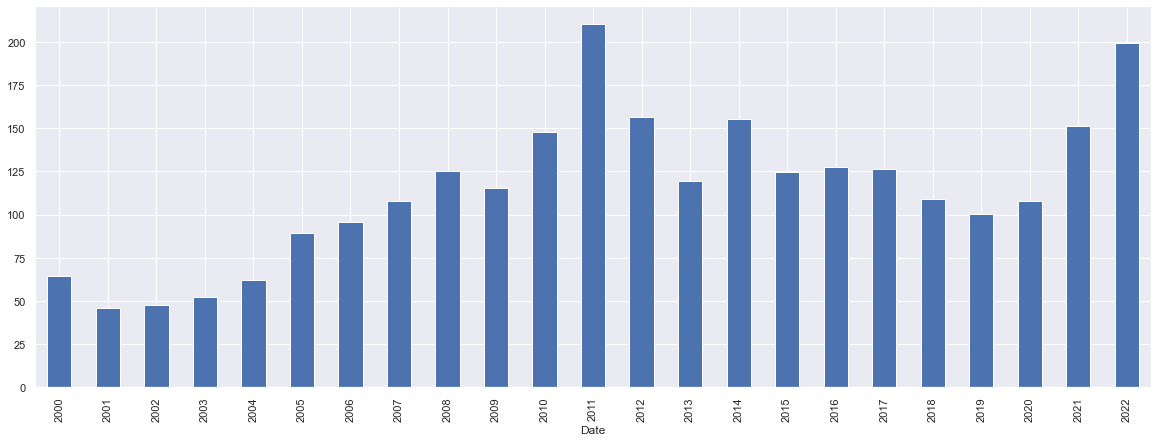

In [48]:
# ploting the Average per year
avg_year.plot( kind = 'bar', figsize = (20,7));
#plt.savefig('avg_year.svg')

In [49]:
# Months of February and March is when the coffe has the highest prices, not a significant increase in price with only 3%
avg_month = eda.groupby(eda['Date'].dt.month_name())['OIC_price'].mean()
avg_month.agg(['min','max'])

min    111.489454
max    115.209163
Name: OIC_price, dtype: float64

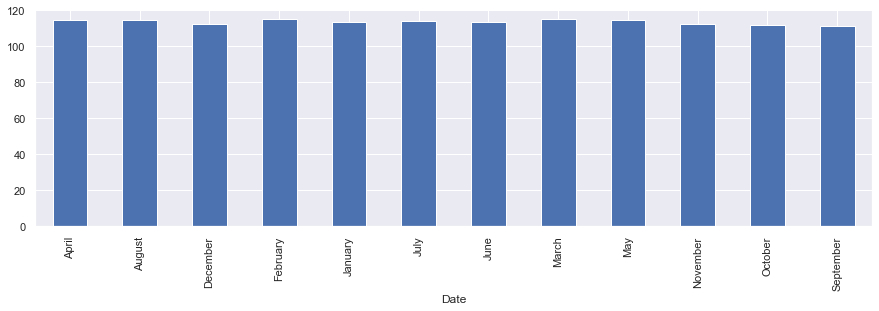

In [50]:
# ploting the average each month
avg_month.plot( kind = 'bar', figsize = (15,4));

### Chequing for Normality

Create a copy of the dataframe to work with, remove the date column, then will check the variables for Normality, as is one of the conditions to do a linear regression

In [51]:
# creates a copy of the original dataframe
test = df.copy()

# saves the column 'Date' as date  and removes the column 'Date' from the new dataframe 'test'
date = test['Date']
test = test.drop(['Date'], axis = 1)

# confirm that has been droped
test.head(2)

,OIC_price,Colombia_ny,Colombia_europe,Colombia_average,Other_ny,Other_europe,Other_average,Brazil_ny,Brazil_europe,Brazil_average,Robustas_ny,Robustas_europe,Robustas_average
0,82.15,130.12,124.36,130.13,109.17,116.82,111.11,97.67,103.1,97.68,53.62,52.41,53.18
1,76.15,124.72,118.67,124.73,101.17,110.19,103.44,91.51,96.58,91.51,49.41,47.97,48.85


### Split the data frame intro X and y

In [53]:
def create_Xy(df):
    '''Function that takes the dataframe and separates it into the independant variables 'X', with the following
    columns Colombia_average','Other_average','Brazil_average','Robustas_average', and dependant Variables 'y'
    with the column "OIC_price" '''
    
    X = df[['Colombia_average', 'Other_average','Brazil_average','Robustas_average']]
    y = df[['OIC_price']]
    return X, y

In [54]:
# use the function to create x and y
X, y = create_Xy(test)

Now that X and y are created, I will do a QQ plot in order to check for Normality.

In [55]:
def plot_QQ(df,column):
    '''Function that creates a QQ plot, receives a dataframe and the name of the column and checks for Normality'''
    
    import pylab
    import statsmodels.api as sm

    # creates QQ plot and a line at 45 degrees, input df and column name
    sm.qqplot(df[column], line = '45')
    pylab.show()

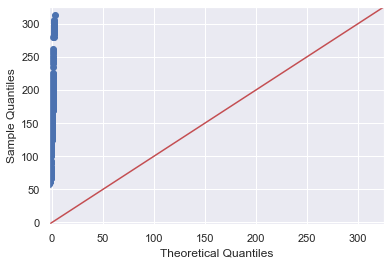

In [56]:
plot_QQ(X,'Colombia_average')

### Normalizing the Data Frame

To normalize the data, I am going to create two  dataframes, one without the ['Date'] column, and another one just with the ['Date'] column, once is normalized with MinMaxScaler(), and converte to a dataframe will be appended to the first dataframe that contains only the column ['Data'] 

As there is not Normality, and the outliers are real values and not errors, then I will proceed to Normalize the data, first with MinMax normalizer and then with Standar Normalizer

In [57]:
# create functions to do normalization or standarization
def MinMax_normalizer(data):
    '''Function that applies normalization with the Minimum and Maximum to the dataframe and then adds the names
    to the columns'''
    from sklearn.preprocessing import MinMaxScaler

    # saves the names of the columns as a list
    column_names = list(data.columns)
    
    # normalizing with MinMaxScaler()
    scaler = MinMaxScaler()

    # fits and transforms the dataframe
    array_scaled = scaler.fit_transform(data)
    
    # takes the array back as a dataframe
    df_exit = pd.DataFrame(array_scaled)

    # renames the dataframe with the saved names from above
    df_exit.columns = column_names

    return df_exit
          
    
def Standar_normalizer(data):
    '''Function that applies standarization with the Standar deviation to the dataframe and then adds the names to the columns'''
    from sklearn.preprocessing import StandardScaler
    
    
    # saves the names of the columns as a list
    column_names = list(data.columns)
    
    # normalizing with standar deviation
    scaler = StandardScaler()
    
    # fits and transforms the dataframe
    array_scaled = scaler.fit_transform(data)
    
    # takes the array back as a dataframe
    df_exit = pd.DataFrame(array_scaled)

    # renames the dataframe with the saved names from above
    df_exit.columns = column_names

    return df_exit 

In [58]:
# Normalizing with MinMaxScaler and StandarScaler
df_MinMax = MinMax_normalizer(test)
df_Standard = Standar_normalizer(test)

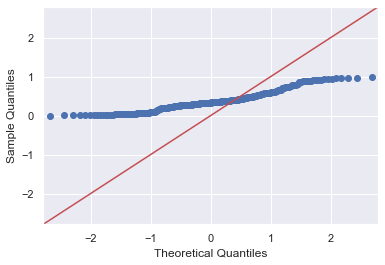

In [59]:
# creates X and y but with normalized values via MinMax
X, y = create_Xy(df_MinMax)

# checkin if there is Normality
plot_QQ(X,'Colombia_average')

There is still no normality, I will try now with StandarScaler normalization and then create a QQ plot

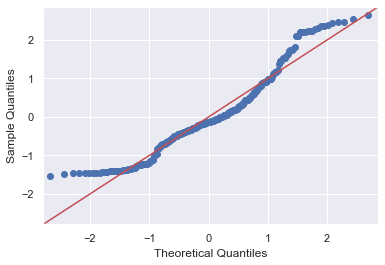

In [60]:
# creates X and y but with normalized values via MinMax
X, y = create_Xy(df_Standard)

# checkin if there is Normality
plot_QQ(X,'Colombia_average')

As there is Normality with this normalization proces, I'll check the rest of the columns

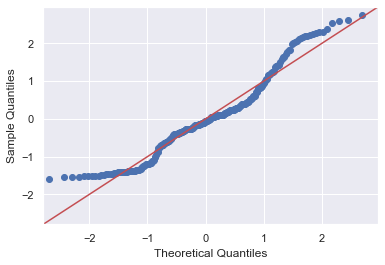

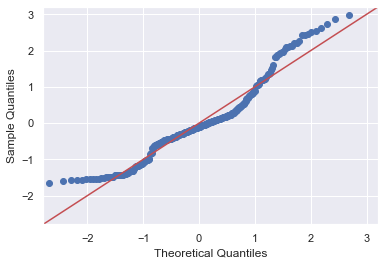

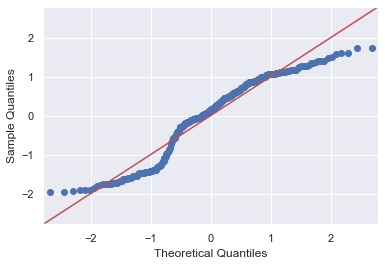

In [61]:
# checkin if there is Normality on the other columns
plot_QQ(X,'Other_average')
plot_QQ(X,'Brazil_average')
plot_QQ(X,'Robustas_average')

Now I will concatenate the dataframe with the dataframe called 'date'

In [62]:
# concatenating both dataframes and checking the result
#df_MinMax = pd.concat([date, df_MinMax], axis = 1)
df_Standard = pd.concat([date, df_Standard], axis = 1)

### Split the data frame intro Train set (X) and Test set (y)

In [63]:
from sklearn.model_selection import train_test_split

# create X_train,X_test,y_train,y_test FROM the variables X and y, using 30% of the dataset for testing.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=10)

print(f'X_train: {len(X_train)} elements  |  y_train: {len(y_train)} elements')
print(f'X_test: {len(X_test)} elements    |  y_test: {len(y_test)} elements')

X_train: 190 elements  |  y_train: 190 elements
X_test: 82 elements    |  y_test: 82 elements


## Linear Regression

In [64]:
#importing th necesary libraries
from sklearn.linear_model import LinearRegression

# create the linear regression model
model_regression = LinearRegression()

# train the model
model_regression.fit(X_train, y_train)

#obtain a prediction
predicted_regression = model_regression.predict(X_test)

In [65]:
# checking the metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# call the metrics and saves them
mae = mean_absolute_error(y_test, predicted_regression)
mse = mean_squared_error(y_test, predicted_regression)
r2 = r2_score(y_test, predicted_regression)

print("The model metrics are")
print("--------------------------------------")
print(f'Mean Absolute Error is {mae}')
print(f'Mean Squared Error is {mse}')
print(f'Root mean Squared Error is {r2}')

The model metrics are
--------------------------------------
Mean Absolute Error is 0.029764147376971146
Mean Squared Error is 0.0019522112353360902
Root mean Squared Error is 0.9979676057202964


In [66]:
# creates an empty dataframe to store the results
results = pd.DataFrame()
results['actual'] = y_test
results['predicted_regression'] = predicted_regression
results.head(5)

,actual,predicted_regression
180,0.793596,0.797556
24,-1.609199,-1.668624
183,0.352846,0.346717
214,0.083220,0.111053
56,-1.196197,-1.228795


In [67]:
# # axes and size
# fig = plt.figure(figsize = [15,7])
# ax = fig.add_subplot()

# # draws a scater plot wit y_test_predict and y_test
# ax.scatter(y_test_predicted, y_test, edgecolors=(0, 0, 1))

# # draws the line 
# ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

# # set label in X
# ax.set_xlabel('Predicted')

# # set label in Y
# ax.set_ylabel('Actual')

# # to show the plot
# plt.show()

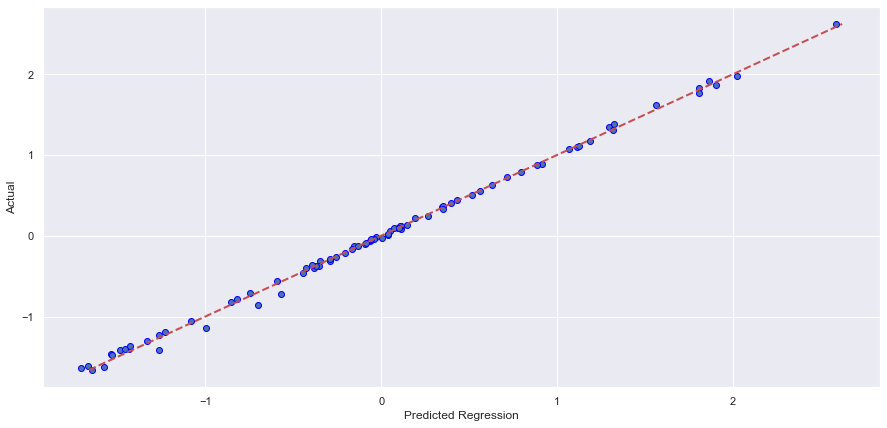

In [88]:
# plotting Actual vs Predicted
# axes and size
fig = plt.figure(figsize = [15,7])
ax = fig.add_subplot()

# draws a scater plot wit results_predict and results
ax.scatter(results.predicted_regression, results.actual, edgecolors=(0, 0, 1))

# draws the line 
ax.plot([results.actual.min(), results.actual.max()], [results.actual.min(), results.actual.max()], 'r--', lw=2)

# set label in X
ax.set_xlabel('Predicted Regression')

# set label in Y
ax.set_ylabel('Actual')

# to show the plot
plt.show()

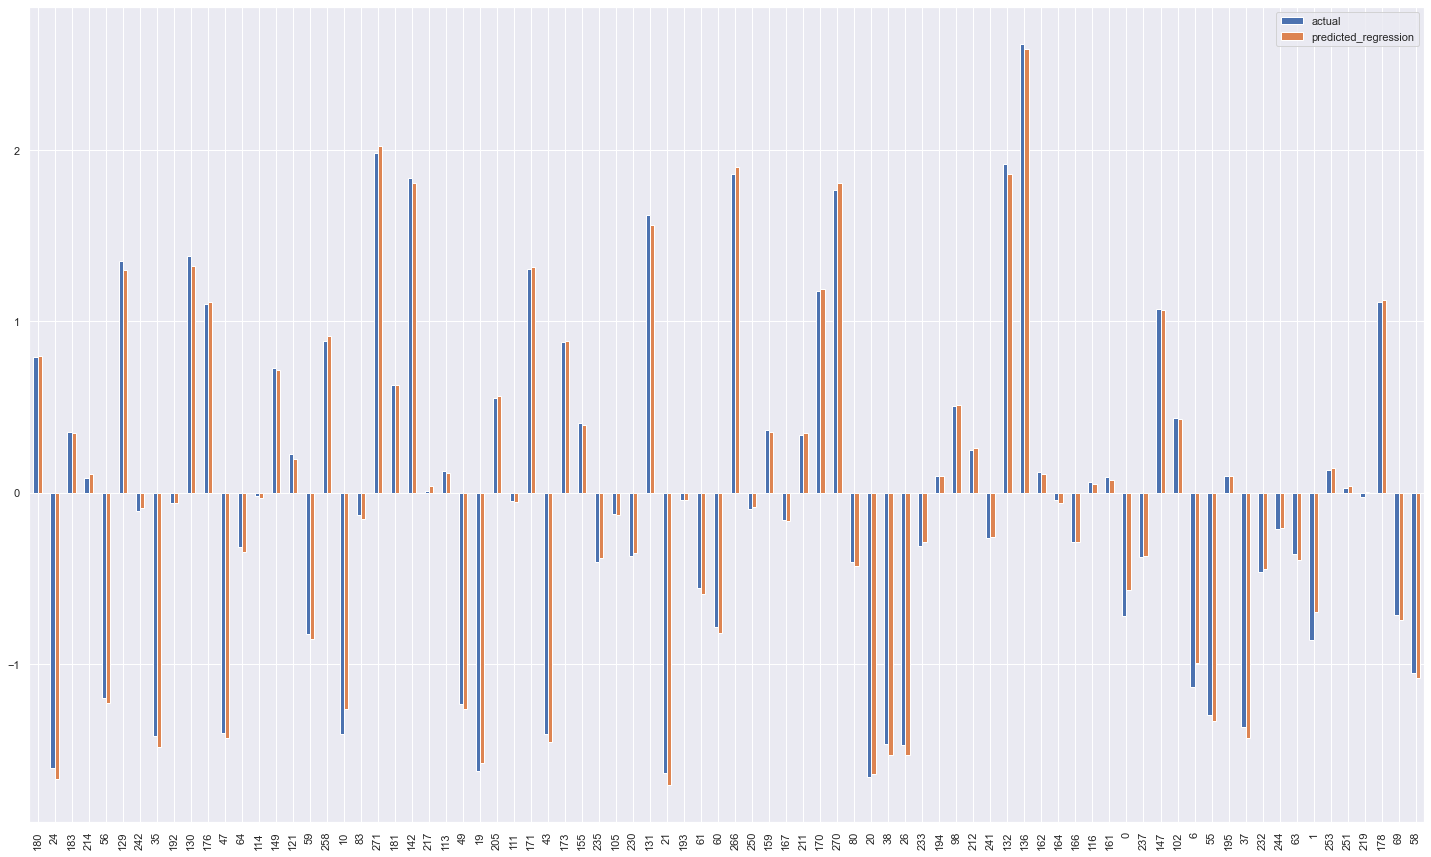

In [89]:
# Plotting Actual price vs predicted price
results.plot(kind='bar',figsize=(25,15))
plt.show()

In [90]:
# calling the coefficents and the intercept of the equation that governs the regression
print(f'Intercept: {model_regression.intercept_}')
print(f'Coefficients: {model_regression.coef_}')

Intercept: [-0.00045371]
Coefficients: [[0.20726811 0.22412621 0.38735344 0.21801437]]


### Decision Tree Regressor

In [91]:
# import the necesary libraries
from sklearn.tree import DecisionTreeRegressor

# create the model
model_tree = DecisionTreeRegressor(random_state=10)

# train the model
model_tree.fit(X_train, y_train)

# obtain the prediction
predicted_tree = model_tree.predict(X_test)

In [95]:
# calls the metrics and saves them
mae = mean_absolute_error(y_test, predicted_tree)
mse = mean_squared_error(y_test, predicted_tree)
r2 = r2_score(y_test, predicted_tree)

print("The model metrics are")
print("--------------------------------------")
print(f'Mean Absolute Error is {mae}')
print(f'Mean Squared Error is {mse}')
print(f'Root mean Squared Error is {r2}')

The model metrics are
--------------------------------------
Mean Absolute Error is 0.06902292437771841
Mean Squared Error is 0.008723598720470259
Root mean Squared Error is 0.9909180974799273


In [92]:
# adds the results to the recently created dataframe 
results['predicted_tree'] = predicted_tree
results.head(5)

,actual,predicted_regression,predicted_tree
180,0.793596,0.797556,0.849090
24,-1.609199,-1.668624,-1.611492
183,0.352846,0.346717,0.329354
214,0.083220,0.111053,0.146231
56,-1.196197,-1.228795,-1.204682


In [96]:
# # creates a linear regression decision tree
# from sklearn.tree import plot_tree
# plt.figure(figsize=(20,8))#, dpi=100)
# plot_tree(model_tree, feature_names=X.columns, fontsize = 12);

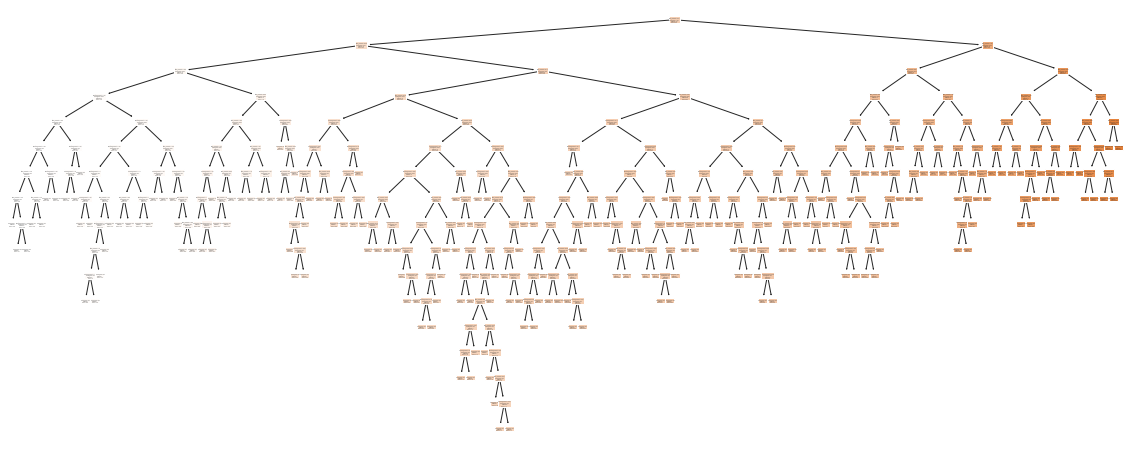

In [94]:
# creates a linear regression decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,8))
plot_tree(model_tree, feature_names=X.columns, filled = True);
plt.savefig('regression tree.svg')

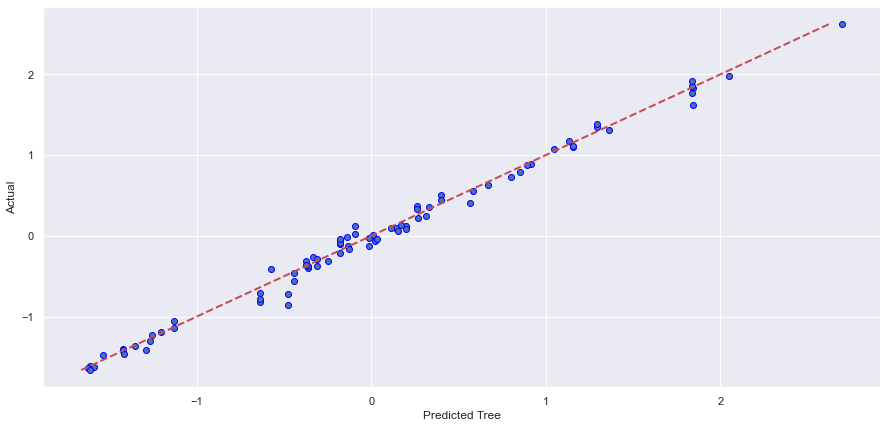

In [98]:
# plotting Actual vs Predicted
# axes and size
fig = plt.figure(figsize = [15,7])
ax = fig.add_subplot()

# draws a scater plot wit results_predict and results
ax.scatter(results.predicted_tree, results.actual, edgecolors=(0, 0, 1))

# draws the line 
ax.plot([results.actual.min(), results.actual.max()], [results.actual.min(), results.actual.max()], 'r--', lw=2)

# set label in X
ax.set_xlabel('Predicted Tree')

# set label in Y
ax.set_ylabel('Actual')

# to show the plot
plt.show()

### LASSO Regressor (Least Absolute Shrinkage and SelectionOperator)

In [99]:
# import the necesary libraries
from sklearn.linear_model import Lasso

# creates the model
lasso_regressor = Lasso(fit_intercept=False)

# train the model
lasso_regressor.fit(X_train, y_train)

# obtain the predictions
predicted_lasso = lasso_regressor.predict(X_test)


In [100]:
results['predicted_lasso'] = predicted_lasso
results.head(5)

,actual,predicted_regression,predicted_tree,predicted_lasso
180,0.793596,0.797556,0.849090,0.007771
24,-1.609199,-1.668624,-1.611492,-0.014744
183,0.352846,0.346717,0.329354,0.002757
214,0.083220,0.111053,0.146231,0.000434
56,-1.196197,-1.228795,-1.204682,-0.009926


In [101]:
mae = mean_absolute_error(y_test, predicted_lasso)
mse = mean_squared_error(y_test, predicted_lasso)
r2 = r2_score(y_test, predicted_lasso)

print("The model metrics are")
print("--------------------------------------")
print(f'Mean Absolute Error is {mae}')
print(f'Mean Squared Error is {mse}')
print(f'Root mean Squared Error is {r2}')

The model metrics are
--------------------------------------
Mean Absolute Error is 0.7466101534276229
Mean Squared Error is 0.9429187411097006
Root mean Squared Error is 0.018352819116568497


## SVM Support Vector Machine Regressor

In [ ]:
#  SVM are sensitive to feature scales, so is better to scale or Normalize the dataframe
# using Standard Scaler and MinMax Scaler

# I have to use train and test again, with the normalized values


In [ ]:
# create the Independant variable 'X' and Independetnt Variables 'y' and use the function Train_Test_Split

X_standard = df_Standard[['Colombia_average', 'Other_average','Brazil_average','Robustas_average']]
y_standard = df_Standard[['OIC_price']]

In [ ]:
from sklearn.model_selection import train_test_split

# create X_train,X_test,y_train,y_test FROM the variables X and y, using 30% of the dataset for testing.
X_train_standard, X_test_standard, y_train_standard, y_test_standard = train_test_split(X_standard,y_standard,
                                                                                         test_size = 0.3, random_state=10)

print(f'X_train: {len(X_train_standard)} elements  |  y_train: {len(y_train_standard)} elements')
print(f'X_test: {len(X_test_standard)} elements    |  y_test: {len(y_test_standard)} elements')

In [ ]:
from sklearn.svm import LinearSVC
svm_regressor = LinearSVC(C = 1, loss = 'Hinge')
svm_regressor.fit(X_train_standard, y_train_standard)
predicted_svm = svm_regressor.predict(X_test_standard)

### Neural Network

In [ ]:
# #dense layer (from one neuron to all neurons)
# #units = 1, the number of output layers (in this case, I need OIC_price, which is 1 neuron)
# #input_shape = 4, is the amount of input neurons, in this case I have 4 values: 
#              #'Colombia_average','Other_average','Brazil_average','Robustas_average'
# layer = tf.keras.layers.Dense(units = 1, input_shape = [4])

# #I have to build a model for the layers, in this case is the Sequential that is for a neural network thta is not advanced
# model = tf.keras.Sequential([layer])

In [ ]:
# # I have to prepare the model to be trained (this is called compiler)
# # I use an optimizer called Adam, allows the network how to use the bias and weights in an efficient way
# # so it t it learns and instead of unlearning ( get better step by step)
# # learning rate is 0.1, which indicates how to adjust the weights and bias

# # for a loss I am going to use 'mean_squared_error', basically small amount of big errors is worst that biga amount of small errors
# model.compile(
#     optimizer = tf.keras.optimizers.Adam(0.1),
#     loss ='mean_squared_error'
# )

In [ ]:
# print('Begining Training...')
# # epochs  = 1000 , is how many times I want it to loop (1 loop mean checking all 272 entries)
# # usually the more epochs better training but only until certain point
# # verbose = false, so it doesn't print anything
# historial = model.fit(X,y,epochs = 1000, verbose = False)
# print('Model has been trained!')

In [ ]:
# # to see the loss, basiucally how bad are the results with each loop taht it did
# plt.xlabel('# Epoch')
# plt.ylabel('Loss')
# plt.plot(historial.history['loss'])

In [ ]:
# print('Hagamos una prediccion!')
# resultado = modelo.predict([[0.498960], [0.552066], [0.531882], [0.758294]])
# print(f'El resultado es {resultado} OIC_price!')


In [ ]:
# print('variables internas del modelo')
# print(layer.get_weights())
# # y = C*1.7981566 + 31.92808